# CIOOS Atlantic Data Catalogue

CKAN https://docs.ckan.org/en/latest/api/index.html

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint

CIOOS metadata is stored in a CKAN Data Catalogue. Complete documenation for CKAN is at https://docs.ckan.org for automated access, we want to focus on the API.  From the documentation: 
> CKAN’s Action API is a powerful, RPC-style API that exposes all of CKAN’s core features to API clients. All of a CKAN website’s core functionality (everything you can do with the web interface and more) can be used by external code that calls the CKAN API.

From a Python environment, there is a package called [ckanapi](https://github.com/ckan/ckanapi) that wraps this API.

In [121]:
from ckanapi import RemoteCKAN

In [122]:
ckan_url = 'https://cioosatlantic.ca/ckan/'
ckan = RemoteCKAN(ckan_url)  # User Agent options available if needed

The API contains all the functionality for interacting with CKAN. For this tutorial, we focus only the API GET (those with `ckan.logic.action.get`) calls that can be used without administrator access.

## Site information

In [123]:
ckan.address

'https://cioosatlantic.ca/ckan/'

Verify that the API can connect to a valid CKAN server.

In [124]:
ckan.action.site_read()

True

Get some information about the CKAN server.

In [125]:
ckan.action.status_show()

{'ckan_version': '2.8.3',
 'site_url': 'https://cioosatlantic.ca',
 'site_description': '{"fr": "", "en": ""}',
 'site_title': '{"fr": "CKAN", "en": "CKAN"}',
 'error_emails_to': None,
 'locale_default': 'en',
 'extensions': ['stats',
  'text_view',
  'image_view',
  'recline_view',
  'datastore',
  'datapusher',
  'harvest',
  'ckan_harvester',
  'csw_harvester',
  'waf_harvester',
  'doc_harvester',
  'geonetwork_harvester',
  'ckan_schema_harvester',
  'ckan_spatial_harvester',
  'spatial_metadata',
  'spatial_query',
  'spatial_harvest_metadata_api',
  'googleanalyticsbasic',
  'cioos_theme',
  'cioos_harvest',
  'package_converter',
  'scheming_datasets',
  'scheming_organizations',
  'repeating',
  'composite',
  'fluent',
  'dcat',
  'structured_data']}

We can see that the CIOOS Atlantic site is currently running version 2.8.3 and has a number of CKAN extensions installed.

## Packages

In CKAN, a specific dataset is called a *package*.  CKAN packages are uniquely identified by an identifier.  We can list the identifiers of all the available packages:

In [126]:
ckan.action.package_list(limit=10)

['0c789db6-ae46-4899-9d7e-eb151bf49fdd',
 '0fb1bc5e-0eb6-4dba-b494-0b80845b2030',
 '147423a6-b150-4cf5-9338-d9cbfb7452db',
 '2ed26c3c-d328-453d-86cb-eef7ab3f9c58',
 '354ef3d6-4d39-48e4-8adc-518fbb425752',
 '38882a03-33a7-45b9-b2bd-916268f1e073',
 '4bf9f57d-f7c1-4522-b7ec-82deafb0bb31',
 '61f4cc32-0833-406f-80da-b725418239f3',
 '65931687-684a-41b5-9aa5-086a9e72b5c5',
 '69423be3-f4e7-46d1-9bf3-b3135b88ef7c']

To search for packages that match a solr query string:

In [127]:
results = ckan.action.package_search(q="SmartAtlantic")

n = 1
package = results['results'][n]

print(f"Package {n+1} of {results['count']}:")
print()
print(f"package_id:\n {package['resources'][0]['package_id']}\n")

package = results['results'][n]
keys = ['title_translated', 'notes_translated', 
        'keywords', 'license_id', 
        'spatial', 'temporal-extent', 
        'state', 'progress']
for key in keys:

    if isinstance(package[key], dict) and 'en' in package[key]:
        value = package[key]['en']
    else:
        value = package[key]
    print(f"{key}:\n {value}\n")

print(f"url:\n {package['resources'][0]['url']}\n")


Package 2 of 34:

package_id:
 828d62d9-fec5-44ec-9b97-084a06c28f6c

title_translated:
 XEOS HK4 Buoy Wave Sensor

notes_translated:
 The Brizo is a GNSS-based, directional wave height sensor. Developed by Xeos Technologies, it is a breakthrough product on the market that provides significant wave height, maximum wave height, peak wave period, average wave direction, and average wave spread. It was installed on the HK4 navigational buoy in the Halifax Harbour near Meagher's Beach.\n\nWhen the Port Authority raised a need for capturing wave data at this location, Xeos Technologies was happy to provide and install its own wave height sensor for the SmartAtlantic project. It is an opportunity to aid in the environmental monitoring of harbor conditions.

keywords:
 ['time', 'timestamp', 'sea_surface_swell_wave_period', 'level', 'data', 'seaSurfaceHeight', 'Significant Wave Height', 'Earth Science', 'wavedirection', 'name', 'longitude', 'speed', 'maximumwaveheight', 'period', 'Oceans', 'swe

We can also look up the details of a package directly using the package id:

In [128]:
package = ckan.action.package_show(id='828d62d9-fec5-44ec-9b97-084a06c28f6c')

print(f"package_id:\n {package['resources'][0]['package_id']}\n")
keys = ['title_translated', 'spatial', 'temporal-extent', ]
for key in keys:

    if isinstance(package[key], dict) and 'en' in package[key]:
        value = package[key]['en']
    else:
        value = package[key]
    print(f"{key}:\n {value}\n")

package_id:
 828d62d9-fec5-44ec-9b97-084a06c28f6c

title_translated:
 XEOS HK4 Buoy Wave Sensor

spatial:
 {"type": "Polygon", "coordinates": [[[-63.5327, 44.5873], [-63.5527, 44.5873], [-63.5527, 44.6073], [-63.5327, 44.6073], [-63.5327, 44.5873]]]}

temporal-extent:
 {"begin": "2019-07-19", "end": "2019-08-10"}



There are other metadata keys in a package that may be of interest.

In [129]:
package.keys()

dict_keys(['notes_translated', 'bbox-east-long', 'license_title', 'maintainer', 'author', 'relationships_as_object', 'unique-resource-identifier-full', 'resource-type', 'bbox-north-lat', 'private', 'maintainer_email', 'num_tags', 'xml_location_url', 'keywords', 'metadata-language', 'id', 'metadata_created', 'title_translated', 'cited-responsible-party', 'metadata_modified', 'bbox-south-lat', 'author_email', 'metadata-point-of-contact', 'state', 'spatial', 'progress', 'type', 'resources', 'creator_user_id', 'num_resources', 'tags', 'bbox-west-long', 'dataset-reference-date', 'frequency-of-update', 'groups', 'license_id', 'relationships_as_subject', 'temporal-extent', 'organization', 'name', 'isopen', 'url', 'notes', 'owner_org', 'extras', 'license_url', 'eov', 'title', 'revision_id', 'vertical-extent'])

We could also make Pandas dataframe of many packages.

In [137]:
package_list = ckan.action.package_list()

packages = [ckan.action.package_show(id=id) for id in package_list]
packages = pd.DataFrame(packages).set_index('id')

In [138]:
# Remove CIOOS Atlantic WAF, id='655942b6-a2ea-46da-a52b-8aea5a786b9b'
packages = packages.drop(index='655942b6-a2ea-46da-a52b-8aea5a786b9b')

In [ ]:
packages.loc

In [149]:
packages.loc[:,('title','state', 'progress')].head()

,title,state,progress
id,,,
62a3d197-1070-4ada-9ef2-4dbfdaf78944,Placentia Bay: North Harbour - NHARB,active,onGoing
a8ba88cb-b70b-42fa-8bae-98c97cfe5049,Halifax (Herring Cove) Buoy,active,onGoing
406628c6-7699-40ee-8b68-46862e7e9076,"NEGL, Rigolet, Nunatsiavut (NLQU0002)",active,onGoing
955e4fc4-e0aa-4734-a121-1faf2569b4cf,Manolis Buoy,active,onGoing
dd254f78-b13f-4ed4-a21a-b4326ac8bde5,Channel-Port Aux Basques Buoy,active,onGoing


## Tags

CKAN supported free form *tags* to help with data discovery. 

In [130]:
tags = ckan.action.tag_list()

tag_words = []
for tag in tags:
    tag = tag.lower()
    
    if '_' in tag:
        tag_parts = tag.split('_')
    else:
        tag_parts = tag.split(' ')
    tag_words += tag_parts

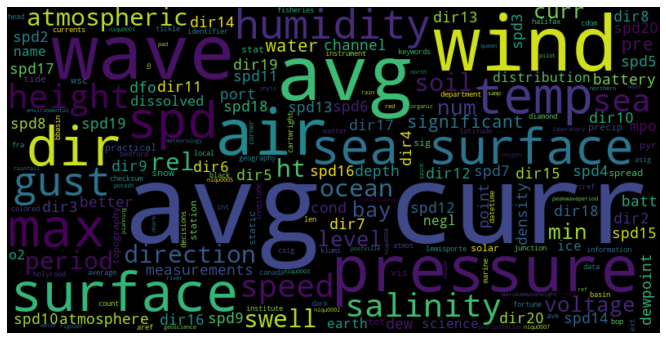

In [131]:
# Generate a word cloud image
from wordcloud import WordCloud
wordcloud = WordCloud().generate(' '.join(tag_words))

wordcloud = WordCloud(width=800, height=400).generate(' '.join(tag_words))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('tag_cloud.png')
plt.show()

## Organizations

In [73]:
organizations = ckan.action.organization_list(all_fields=True)
organizations = pd.DataFrame(organizations).set_index('id')
organizations

,display_name,description,image_display_url,package_count,created,name,is_organization,state,image_url,type,title,revision_id,num_followers,approval_status
id,,,,,,,,,,,,,,
189140ed-bc3c-410c-abfb-ae877ead64df,smartatlantic,,,32,2020-06-12T09:21:05.423903,smartatlantic,True,active,,organization,,c310575c-07ae-4b70-b638-f65d19f1a620,0,approved
ab872f33-5375-42cb-a5df-252570ebf5de,fisheries-and-oceans-canada,,,1,2020-06-12T09:23:51.432892,fisheries-and-oceans-canada,True,active,,organization,,0059de07-0da5-4c90-aba5-eb5e2835fe5d,0,approved
c705c72b-1d3c-4a60-b3fd-c09724baa0bb,ceotr,,,1,2020-06-12T09:30:25.907262,ceotr,True,active,,organization,,4fee8769-a60d-46f1-88c4-0f809b81fb6d,0,approved


In [74]:
users = ckan.action.user_list()
users_df = pd.DataFrame(users).set_index('id')
users_df

,email_hash,about,display_name,name,created,sysadmin,activity_streams_email_notifications,state,number_of_edits,fullname,number_created_packages
id,,,,,,,,,,,
a9952719-af67-4ae9-a5e0-26778acd6668,d41d8cd98f00b204e9800998ecf8427e,None,default,default,2020-06-12T08:43:03.111863,True,False,active,34,None,34
2ab437b5-129b-4a4a-ac9f-7de8df3e13e5,af9f73e8b5443986572f1ffe7f1046c3,None,Jeff Cullis,jcullis,2019-11-26T12:31:24.409584,True,False,active,0,Jeff Cullis,0
8e628c04-4c22-4595-8f80-b9c53355204b,b53baa675f1abe0b3f1de8701c4a2a46,None,jthomp,jthomp,2020-06-12T08:44:21.140649,True,False,active,7,None,1
77224b8d-bffa-478c-963a-1893c7df2f54,4503919a6b983e44fc16e6b279cff95e,,Odum Idika,oidika,2019-11-29T11:05:13.643623,True,False,active,0,Odum Idika,0
f997956e-4417-4c4f-a21c-c01335aa9eec,7e32bc12b8dbbacb514f11bafe69bc65,None,Scott Bruce,scottbruce,2019-11-26T12:31:24.409584,True,False,active,0,Scott Bruce,0
